## Families of Discrete Distributions
We will learn about some of the most commonly used discrete distributions, including their
- $f(x)$ (usually $F(x)$ is not available in closed form)
    - Notation for $pmf$ that emphasizes the parameters
        - $f(x|\theta)$
- Parameter space $\Theta$ and support $\mathcal{X}=\{x:f(x)>0\}$
- $E(X),Var(X),M(t)$
- Special feartures and connection between distributions

See tables p. 621-627 in the Textbook, just like below:

![描述文字](3-1-1.png)

![描述文字](3-1-2.png)

## Discrete Uniform Distributions

Setting：
- Have $N$ possible outcomes
- Each outcome is equally likely
- $\mathcal{X}={1,2,3,...,N}$
- $f(x) = \frac{1}{N},\forall x=1,2,3,...N$
- $F(x)=\begin{cases}
        \frac{|\lambda|}{N}&1\leq x\leq N\\
        0&x<1\\
        1&x> N
        \end{cases}$

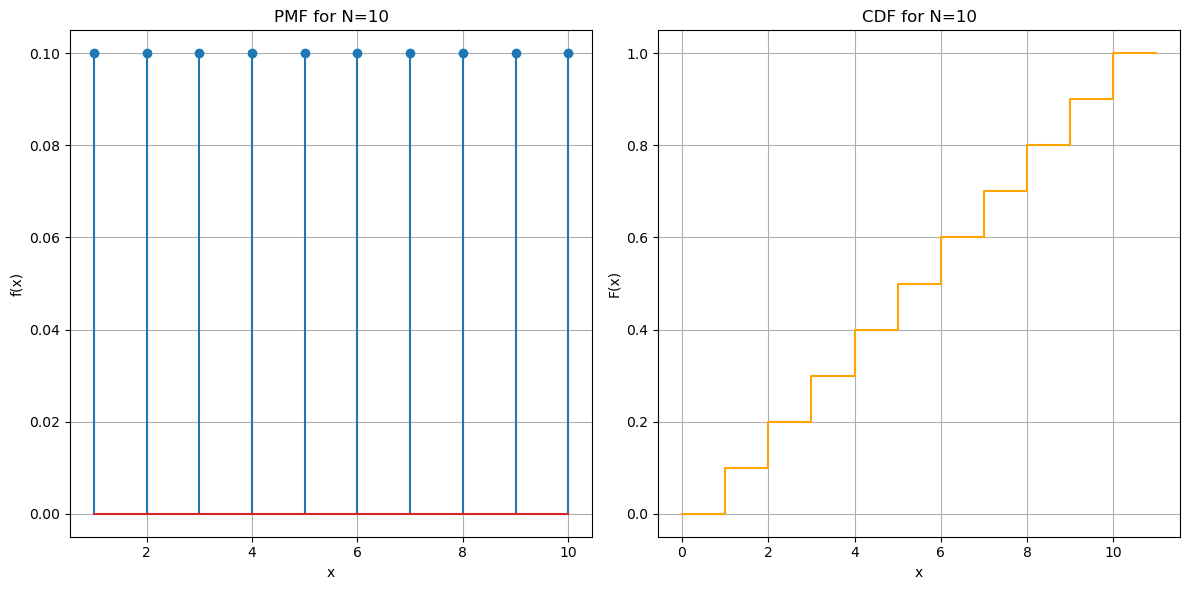

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Cumulative distribution function (CDF)
def F_x(x, N):
    if x < 1:
        return 0
    elif x > N:
        return 1
    else:
        return x / N
    
# Updating N to 10 was already done. Let's re-plot just to confirm.
N = 10

# PMF for N=10
x_vals = np.arange(1, N + 1)
f_x = np.ones(N) / N

# CDF for N=10
cdf_vals = np.array([F_x(x, N) for x in range(0, N + 2)])
x_cdf = np.arange(0, N + 2)

# Plot PMF and CDF again
plt.figure(figsize=(12, 6))

# PMF
plt.subplot(1, 2, 1)
plt.stem(x_vals, f_x, use_line_collection=True)
plt.title(f'PMF for N={N}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

# CDF
plt.subplot(1, 2, 2)
plt.step(x_cdf, cdf_vals, where='post', label='CDF', color='orange')
plt.title(f'CDF for N={N}')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)

plt.tight_layout()
plt.show()

### Note: 

The floor of a number $x$, denoted $\lfloor x \rfloor$, is the greatest integer less than or equal to $x$. For example:

- $\lfloor 4.7 \rfloor = 4$
- $\lfloor -2.3 \rfloor = -3$

- Finite sums of powers

    - $\sum_{i=1}^{n}i=\frac{n(n+1)}2\quad\sum_{i=1}^{n}i^2=\frac{n(n+1)(2n+1)}6$

- Binomial formula: For all $x, y\in\mathbb{R}$ and $n\in\mathbb{N}$

    - $\sum_{i=0}^n\binom nix^iy^{n-i}=(x+y)^n$
    
- Geometric series: For $1 < r < 1$

    - $\sum_{k=0}^\infty r^k=\frac1{1-r}$

$E(x)=\sum_{x=1}^{N}x\frac{1}{N}=\frac{1}{N}\sum_{x=1}^{N}x=\frac{1}{N}\frac{(N+1)N}{2}=\frac{N+1}{2}$

$E(X^{2})=\sum_{x=1}^{n}X^{2}\frac{1}{N}=\frac{1}{N}\frac{N(N+1)(2N+1)}{6}$

$\begin{aligned}
V(x)&=\frac{(N+1)(2N+1)}{6}-\frac{(N+1)^{2}}{4}\\
&=\frac{2(N+1)(2N+1)-3(N+1)^{2}}{12}\\
&=\frac{(N+1)(N-1)}{12}
\end{aligned}$

## Discrete Uniform Distributions – summary

### Probability mass function

$f(x\mid N)=\frac1N\quad\mathrm{~for~}x\in\{1,2,3,\ldots,N\}$
- Parameter space: $N\in\{1,2,3,...\}$

### Mean and Variance

$E(X)=\frac{N+1}{2}\quad\mathrm{Var}(X)=\frac{N^{2}-1}{12}$

### Moment generating function

$M_X(t)=\sum_{x=1}^Ne^{tx}\frac1N,\,\text{(No simplification available)}$

## Binomial distributions

- Bernoulli trial: $n$ independent Bernoulli random variables
    - $X_i$ = outcome of trial $i$ (0 or 1), $i = 1, 2, 3,...,n$
    - Same probability of success ($p$) for all $i$
- $Y$ = total number of successes in $n$ trials
    - Support for $\mathcal{Y}=\{0,1,2,...n\}$
    - $Y=X_1+X_2+\cdots+X_n$
- pmf: $f(y|n,p)=\binom nyp^y(1-p)^{n-y}\quad\mathrm{~for~}y=0,1,\ldots,n$
- How to prove the $\sum_{y=0}^n f(y) = 1$?
    - Proof using the Binomial Theorem:
        - The binomial theorem states that for any real numbers $p$ and $1-p$, and any positive integer $n$:
            - $(p+(1-p))^n=\sum_{k=0}^n\binom{n}{k}p^k(1-p)^{n-k} = 1$
- MGF: $M(t) = (e^tp+1-p)^n$    
    $\begin{align}
    M(t)&=E(e^{ty})\\
         &=\sum_{k=0}^ne^{ty}\binom{n}{y}p^k(1-p)^{n-y}\\
         &=\sum_{k=0}^n\binom{n}{y}(e^tp)^y(1-p)^{n-y}\\
         &=(e^tp+1-p)^n
    \end{align}$
- $E(X)=np$, $Var(X)=np(1-p)$
- Special case: Bernoulli distribution if $n = 1$

## Hypergeometric distributions
- Sample from a finite population, without replacement
- Have a population of N items, M of which are of the type of interest
    - Think: $N$ balls in an urn, $M$ of which are red
- Randomly pick $K$ items, without replacement
    - and unordered
- Random variable of interest:
    - $X$ = number of items of type interested in the sample
- PMF:
    - $f(x|N,M,k)=\frac{\binom Mx\binom{N-M}{k-x}}{\binom Nk},\,x\in\{0,1,2...k\}$
    - $\sum_{x=0}^k f(x|N,M,k) = 1$, $\sum_{x=0}^k\binom Mx\binom{N-M}{k-x}=\binom Nk$
- MGF: no simplification available
- Pre-Knowledge: $\binom{N}{K}=\frac{N}{K}\binom{N-1}{K-1}$
- $E(X) = \frac{KM}{N}$, $Var(X)={\frac{KM}N\frac{(N-M)}N\frac{(N-K)}{N-1}}$

    $\begin{align}
    E(X)&=\sum_{x=0}^k x \frac{\binom Mx\binom{N-M}{k-x}}{\binom Nk}\\
        &=\sum_{x=1}^k \frac{\frac{M!}{(x-1)!(M-x)!}\binom{N-M}{k-x}}{\binom Nk},\,\text{let's set }t=x-1,x=t+1.\\
        &=\sum_{t=0}^{k-1}\frac{\frac{M(M-1)!}{t!((M-1)-t)!}\binom{N-M}{k-t-1}}{\binom{N}{k}}\\
        &=M\sum_{t=0}^{k-1}\frac{\binom{M-1}{t}\binom{N-M}{k-t-1}}{\binom{N}{k}}\\
        &=M\sum_{t=0}^{k-1}\frac{\binom{M-1}{t}\binom{N-M}{k-t-1}}{\frac{N}{k}\binom{N-1}{k-1}}\\
        &=\frac{kM}{N}\sum_{t=0}^{k-1}\frac{\binom{M-1}{t}\binom{N-M}{k-t-1}}{\binom{N-1}{k-1}}\\
        &=\frac{KM}{N}
    \end{align}$
    
    $\begin{align}
    E(X(X-1))&=\sum_{x=0}^k x(x-1) \frac{\binom Mx\binom{N-M}{k-x}}{\binom Nk}\\
        &=\sum_{x=2}^k \frac{\frac{M!}{(x-2)!(M-x)!}\binom{N-M}{k-x}}{\binom Nk},\,\text{let's set }t=x-2,x=t+2.\\
        &=\sum_{t=0}^{k-2}\frac{\frac{M(M-1)(M-2)!}{t!((M-2)-t)!}\binom{N-M}{k-t-2}}{\binom{N}{k}}\\
        &=M(M-1)\sum_{t=0}^{k-2}\frac{\binom{M-2}{t}\binom{N-M}{k-t-2}}{\binom{N}{k}}\\
        &=M(M-1)\sum_{t=0}^{k-2}\frac{\binom{M-2}{t}\binom{N-M}{k-t-2}}{\frac{N(N-1)}{k(k-1)}\binom{N-2}{k-2}}\\
        &=\frac{k(k-1)M}{N(N-1)}\sum_{t=0}^{k-2}\frac{\binom{M-2}{t}\binom{N-M}{k-t-1}}{\binom{N-1}{k-1}}\\
        &=\frac{K(K-1)M(M-1)}{N(N-1)}
    \end{align}$
    
    $\begin{align}
    E(X^2)&=E(X(X-1))+E(X)\\
          &=\frac{K(K-1)M(M-1)}{N(N-1)}+\frac{KM}{N}\\
          &=\frac{KM[(K-1)(M-1)+(N-1)]}{N(N-1)}     
    \end{align}$

$\begin{align}
Var(X)&=E(X^2)-E(X)^2\\
      &=\frac{KM[(K-1)(M-1)+(N-1)]}{N(N-1)}-\frac{K^2M^2}{N^2}\\
      &=\frac{KM}N\frac{(N-M)}N\frac{(N-K)}{N-1}
\end{align}$

- Compare to Binomial Distribution with $n = K$ and $p=\frac{M}{N}$
    - $E(X) = np = \frac{KM}{N}$
    - $Var(X)=np(1-p)\frac{N-K}{N-1}\leq np(1-p)$
    - Same mean but smaller variance than a Binomial random variable
    - Variance similar if $N$ is big and $K<<N$

## Poisson distributions
- PMF: $f(x\mid\lambda)=\frac{e^{-\lambda}\lambda^x}{x!},\,x=\{0,1,2,3,...\},\lambda>0$

    $\begin{align}
    f(x\mid\lambda)&=\frac{e^{-\lambda}\lambda^x}{x!}\\
                   &=\frac{\lambda e^{\lambda} \lambda^{x-1}}{x(x-1)!}\\
                   &=\frac{\lambda}{x}f(x-1)\\
                   &=\frac{\lambda}{x}P(X=x-1)\\
    \end{align}$
- $E(X)=\lambda$, $Var(X)=\lambda$, $M_X(t)=\exp\left(\lambda\left(e^t-1\right)\right)$

## Geometric distributions
- $X=$ number of trials until (and including) we get the first success
- Let $p$ be the probability of success for each trial
- PMF: $f(x)=(1-p)^{x-1}p,\,\forall x=\{1,2,3...\}$
- $\sum_{x=1}^\infty(1-p)^{x-1}p=p\sum_{x=1}^\infty(1-p)^{x-1}=p\frac{1}{1-(1-p)}=1$
- CDF: $F(x) = 1-(1-p)^x$
- $E(X)=\frac{1}{p}$, $Var(X)=\frac{1-p}{p^2}$
- $M_X(t)=\frac{pe^t}{1-(1-p)e^t},\,t<-log(1-p)$
- Geometric series: For $-1 < r < 1$, $\sum_{k=0}^\infty r^k=\frac1{1-r}$
- Geometric sum: For $r\neq 1$, $\sum_{k=0}^nr^k=\frac{1-r^{n+1}}{1-r}$
- If $X\sim Geometric(p)$, then $P(X>n+m|X>n)=P(X>m)$
- Prove:
    - CDF Proof:
    
    $\begin{align}
        F(X)&=\sum_{u=1}^{x}(1-p)^{u-1}p,\,\text{set }t=u-1\\
            &=p\sum_{t=0}^{x-1}(1-p)^t\\
            &=p\frac{1-(1-p)^x}{1-(1-p)}\\
            &=1-(1-p)^x
    \end{align}$
    
    $\begin{align}
        M_X(t)&=\sum_{x=1}^\infty e^{xt}p(1-p)^{x-1},\,k=x-1\\
              &=pe^t\sum_{k=0}^\infty e^{kt}(1-p)^k\\
              &=pe^t\sum_{k=0}^\infty (e^t(1-p))^k\\
              &=\frac{pe^t}{1-(e^t(1-p))},\,t<-log(1-p)
    \end{align}$

## Negative Binomial
- X = number of failures before the $r$ success
- Bernoulli trials until we have $r$ successes
- Let $p$ be the probabilty of success for each trial
- PMF: $f(x|r,p)=\binom{r+x-1}{x}p^r(1-p)^x,\,x=\{0,1,2,3...\}$
- Parameter space: $p\in[0,1],r\in\mathbb{N}$
- $E(X)=\frac{r(1-p)}{p}$, $Var(X)=\frac{r(1-p)}{p^2}$
- MGF: $M_X(t)=\left(\frac p{1-(1-p)e^t}\right)^r,\,t<-log(1-p)$
- $\sum_{x=0}^{\infty}f_{(x)}=\sum_{x=0}^{\infty}(\begin{matrix}x+r-1\\x\end{matrix})p^{r}(1-p)^{x}=1$
- Negative Binomial is often used to model counts as an alternative to Poisson